In [4]:
%load_ext lab_black

In [5]:
import pandas as pd

pd.set_option("max_colwidth", 400)

In [6]:
!ls

index.ann  seriouseats.ipynb  Untitled.ipynb


In [7]:
df = pd.read_csv("../data/seriouseats/seriouseats.csv")
df[df["title"].str.contains("Burger")].head()

,title,short_description,thumbnail,url,description,directions,ingredients,rating,total_time,active_time,yields
77,Cook the Book: Ultimate Sriracha Burger,NaN,https://www.seriouseats.com/recipes/images/20110129-135209-ultimate-sriracha-burger.jpg,https://www.seriouseats.com/recipes/2011/02/ultimate-sriracha-burger-recipe.html,"The Ultimate Sriracha Burger from The Sriracha Cookbook is a mouthful. It begins with a grilled patty infused with Sriracha and soy, and is topped with a towering pile of bacon caramelized onions, Swiss cheese, tomato, arugula, bacon, and an improbably delicious blue cheese-Sriracha dressing. On paper this burger might seem like it has all of the makings for a too much going on overload but ...","In a large mixing bowl, combine the ground beef, soy sauce, 5 tablespoons of the Sriracha, and the pepper. Do not overmix. Form the mixture into 8 patties, and set aside, on a parchment-lined baking sheet, covered, in the refrigerator. ||||Preheat a charcoal or gas grill to medium high heat. \n||||In a medium frying pan over medium-low heat, cook the bacon, turning as necessary. While the baco...","3 pounds ground beef (preferably chuck, 80/20)||||1/4 cup soy sauce||||10 tablespoons Sriracha||||4 teaspoons freshly ground black pepper||||4 slices thick-cut bacon||||2 large sweet onions||||3/4 cup blue cheese dressing ||||8 sesame seed buns||||8 thick slices Swiss cheese||||1 large beefsteak tomato, sliced||||Arugula or romaine lettuce",4.833333,NaN,\n \n \n \n \n \n 4.8333333333333\n,8
201,The Spotted Pig's Chargrilled Burger at Home,NaN,https://www.seriouseats.com/recipes/images/2014/07/20100408-spottedpigburger.jpg,https://www.seriouseats.com/recipes/2010/04/the-spotted-pigs-chargrilled-burger-at-home-recipe.html,Note: Interested in learning how we developed this recipe? Read about it here.,"IF USING A MEAT GRINDER: Place feed shaft, blade, and 3/8ths-inch grinding plate of meat grinder in freezer for at least 30 minutes before grinding. Combine well-chilled meat in large bowl and grind, passing through grinder twice, re-chilling grinder and meat in between grinds if necessary (i.e. if fat starts to smear).||||IF USING A FOOD PROCESSOR: Spread meat on sheet tray and place in freez...","10 ounces well-marbled boneless short rib, cut into 1-inch pieces (or 8 ounces short rib and 2 ounces beef suet—see note)||||10 ounces beef brisket, preferably second-cut, cut into 1-inch pieces||||12 ounces well-marbled chuck roast or chuck stew meat, cut into 1-inch pieces||||Kosher salt and freshly ground black pepper||||8 ounces Roquefort cheese, room temperature||||4 Spotted Pig Burger Buns",NaN,1 hour,30 minutes,makes 4 half-pound burgers
264,Argentine Asado Burgers With Seared Provolone and Chimichurri,Topped with a griddled slab of gooey cheese and spoonfuls of garlicky sauce.,https://www.seriouseats.com/recipes/images/2015/06/20150624-argentine-chimichanga-burger-vicky-wasik-6-625x469.jpg,https://www.seriouseats.com/recipes/2015/07/argentine-asado-burger-chimichurri-provolone-recipe.html,"Even if you've never been to a proper asado, the legendary grilling feast that takes place in the mountains of South America, that doesn't mean you can't enjoy those flavors at home. It doesn't even mean you can't squeeze those flavors between two pieces of bread and transform them into a miraculous cheeseburger. Because you can, and this is the result: a juicy burger patty topped with a gridd...","Press a dimple into the top of each burger patty. Season patties generously with salt and pepper. Heat oil in a large cast iron skillet over high heat until lightly smoking. Add patties and cook, turning, to desired doneness (120°F for rare, 125°F for medium rare, or 135°F for medium). Transfer to a plate and allow to rest for 5 minutes.||||Meanwhile, pour off fat from skillet and wipe clean w...","1 1/2 pounds ground beef chuck, preferably about 80% lean, formed into 4 (6-ounce) patties||||Kosher salt and freshly ground black pepper||||4 (1/4

In [8]:
df.describe()

,rating
count,2898.000000
mean,4.418871
std,0.825618
min,1.000000
25%,4.000000
50%,4.750000
75%,5.000000
max,5.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8312 entries, 0 to 8311
Data columns (total 11 columns):
title                8312 non-null object
short_description    2114 non-null object
thumbnail            8312 non-null object
url                  8312 non-null object
description          7787 non-null object
directions           8282 non-null object
ingredients          8282 non-null object
rating               2898 non-null float64
total_time           5810 non-null object
active_time          6119 non-null object
yields               7518 non-null object
dtypes: float64(1), object(10)
memory usage: 714.4+ KB


# Download Images of Meals

In [10]:
from urllib import request
from urllib.error import HTTPError
import os
from tqdm import tqdm_notebook
import time

image_urls = df["thumbnail"]
for url in tqdm_notebook(image_urls):
    image_path = os.path.join("../data/seriouseats/images", url.rsplit("/", 1)[-1])
    if not os.path.isfile(image_path):
        req = request.Request(url, headers={"User-Agent": "Mozilla/5.0"})
        try:
            page = request.urlopen(req)
            with open(image_path, "wb") as f:
                f.write(page.read())
                time.sleep(0.5)
        except Exception as e:
            print(f"Skipping {url} ({e})")

Skipping https://www.seriouseats.com/recipes/images/Fried%20Rice%20with%20Ginger.jpg (HTTP Error 404: Not Found)
Skipping https://www.seriouseats.com/recipes/images/Dinner%20Tonight%20-%20Blumenthal%27s%20Roast%20Potatoes.jpg (HTTP Error 404: Not Found)
Skipping https://www.seriouseats.com/recipes/images/20081006%2Csichuan%20sirloin%20salad.jpg (HTTP Error 404: Not Found)
Skipping https://www.seriouseats.com/recipes/images/Dinner%20Tonight%20-%20Pacific%20Rim%20Glazed%20Flank%20Steak.jpg (HTTP Error 404: Not Found)
Skipping https://www.seriouseats.com/recipes/images/Dinner%20Tonight%20-%20Sopes.jpg (HTTP Error 404: Not Found)
Skipping https://www.seriouseats.com/recipes/images/Dinner%20Tonight%20-%20Shrimp%20Tacos%20with%20Pumpkin%20Seed%20Sauce.jpg (HTTP Error 404: Not Found)
Skipping https://www.seriouseats.com/recipes/images/Serious%20Barbecue.jpg (HTTP Error 404: Not Found)
Skipping https://www.seriouseats.com/recipes/images/Dinner%20Tonight%20-%20Sauteed%20Broccoli%20with%20Crispy

In [11]:
df["image_path"] = df["thumbnail"].apply(
    lambda x: os.path.join("../data/seriouseats/images", x.rsplit("/", 1)[-1])
)
df = df[df["image_path"].apply(lambda x: os.path.isfile(x))]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8304 entries, 0 to 8311
Data columns (total 12 columns):
title                8304 non-null object
short_description    2114 non-null object
thumbnail            8304 non-null object
url                  8304 non-null object
description          7779 non-null object
directions           8274 non-null object
ingredients          8274 non-null object
rating               2897 non-null float64
total_time           5810 non-null object
active_time          6118 non-null object
yields               7515 non-null object
image_path           8304 non-null object
dtypes: float64(1), object(11)
memory usage: 843.4+ KB


# Cluster Recipes accoring to Image Similarity

In [12]:
import tensorflow as tf

tf.__version__

'2.0.0-alpha0'

In [13]:
df_images = df[["title", "image_path"]]
df_images.head()

,title,image_path
0,Jammy Fruit Bars,../data/seriouseats/images/20190429-fruit-oat-bars-vicky-wasik-20-625x469.jpg
1,Balsamic Glazed Baby Back Ribs,../data/seriouseats/images/20130519-252806-balsamic-glazed-ribs-625x469.jpg
2,The Best Meatball Pizza,../data/seriouseats/images/20150109-meatball-pizza-small-balls-8-625x469.jpg
3,Easy Pork Rillettes (Slow-Cooked Pork Spread),../data/seriouseats/images/20170215-pork-rillettes-12-625x469.jpg
4,Duck Pastrami,../data/seriouseats/images/20130227-242590-duck-pastrami.jpg


In [14]:
IMAGE_SIZE = 224
IMG_SHAPE = (IMAGE_SIZE, IMAGE_SIZE, 3)
base_model = tf.keras.applications.MobileNetV2(
    input_shape=IMG_SHAPE, include_top=True, weights="imagenet"
)

In [15]:
from keras.applications import imagenet_utils


def process_img(image_path):
    img = tf.io.read_file(image_path)
    img = tf.image.decode_jpeg(img)
    img = (tf.cast(img, tf.float32) / 127.5) - 1
    img = tf.image.resize(img, (IMAGE_SIZE, IMAGE_SIZE))
    img = img[:, :, :3]  # discard alpha channel of PNGs
    return img


data = (
    tf.data.Dataset.from_tensor_slices(df_images["image_path"].tolist())
    .map(process_img)
    .batch(256)
)

Using TensorFlow backend.


In [16]:
pred = base_model.predict(data)

In [17]:
df_images["prediction"] = [p[0][1] for p in imagenet_utils.decode_predictions(pred)]
df_images.head()

/home/mike/.local/share/virtualenvs/seefood-qNVnXCKQ/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,title,image_path,prediction
0,Jammy Fruit Bars,../data/seriouseats/images/20190429-fruit-oat-bars-vicky-wasik-20-625x469.jpg,tray
1,Balsamic Glazed Baby Back Ribs,../data/seriouseats/images/20130519-252806-balsamic-glazed-ribs-625x469.jpg,meat_loaf
2,The Best Meatball Pizza,../data/seriouseats/images/20150109-meatball-pizza-small-balls-8-625x469.jpg,pizza
3,Easy Pork Rillettes (Slow-Cooked Pork Spread),../data/seriouseats/images/20170215-pork-rillettes-12-625x469.jpg,mixing_bowl
4,Duck Pastrami,../data/seriouseats/images/20130227-242590-duck-pastrami.jpg,ice_cream


In [18]:
import glob
import random
import base64

from PIL import Image
from io import BytesIO
from IPython.display import HTML

pd.set_option("display.max_colwidth", -1)


def get_thumbnail(path):
    i = Image.open(path).convert("RGB")
    i.thumbnail((224, 224), Image.LANCZOS)
    return i


def image_base64(im):
    if isinstance(im, str):
        im = get_thumbnail(im)
    with BytesIO() as buffer:
        im.save(buffer, "jpeg")
        return base64.b64encode(buffer.getvalue()).decode()


def image_formatter(im):
    return f'<img src="data:image/jpeg;base64,{image_base64(im)}">'

,title,image,prediction
3634,Snapshots from Italy: Pasta e Fagioli with 'Nduja,,corn
7899,Popeyes-Style Chicken Tenders From 'Fried & True',,plate
6273,Dinner Tonight: Roasted Rice Cake,,plate
1545,Cook the Book: Coconut Cabbage with Chiles and Green Peas,,web_site
7363,Seriously Italian: Sicilian-Style Baked Cod,,plate
3299,Cook the Book: Miss Ina's Down-Home Rice Pudding,,potpie
7208,Dinner Tonight: Tortellini with Brown Butter and Sage,,butternut_squash
6621,"Macadamia Nut ""Ricotta"" From 'Nom Nom Paleo'",,ice_cream
260,Alton Brown's Sardine-Avocado Sandwiches,,head_cabbage
396,Dinner Tonight: Farro Risotto with Rapini,,plate

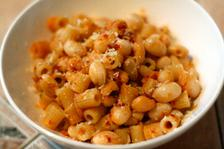
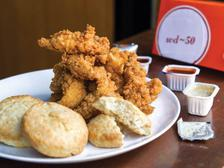
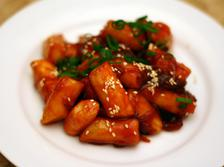
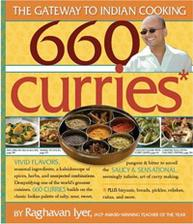
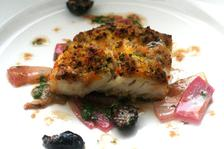
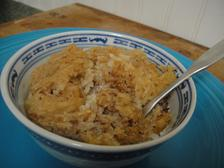
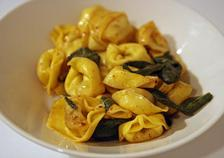
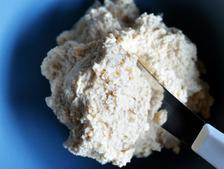
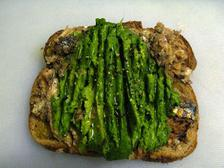
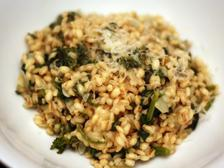

In [19]:
df_images_sample = df_images.sample(10)
df_images_sample["image"] = df_images_sample.image_path.map(lambda x: get_thumbnail(x))
HTML(
    df_images_sample[["title", "image", "prediction"]].to_html(
        formatters={"image": image_formatter}, escape=False
    )
)

In [20]:
feature_model = tf.keras.applications.MobileNetV2(
    input_shape=IMG_SHAPE, include_top=False, weights="imagenet", pooling="avg"
)

In [21]:
features = feature_model.predict(data)
features.shape

(8304, 1280)

In [22]:
dims = features.shape[1]
trees = 10000

In [23]:
from annoy import AnnoyIndex

annoy_index = AnnoyIndex(dims)
for i, f in tqdm_notebook(enumerate(features)):
    annoy_index.add_item(i, f)
if os.path.isfile("index.ann"):
    annoy_index.load("index.ann")
else:
    annoy_index.build(trees)
    annoy_index.save("index.ann")

In [198]:
df_sample = df_images.sample(15)
df_sample.head()

,title,image_path,prediction
7624,Ultimate King Ranch Chicken Casserole,../data/seriouseats/images/20130222-241677-king-ranch-chicken-casserole-edit.jpg,pizza
2637,Vanilla Kipferl,../data/seriouseats/images/20091225-kingarthurflour-thumb.jpg,bottlecap
2932,"Dinner Tonight: Apple, Almond, and Smoked Mozzarella Farro Salad",../data/seriouseats/images/20110615-127355-dinner-tonight-farro-salad-apples-smoked-mozzarella.jpg,soup_bowl
204,New England Clam Chowder,../data/seriouseats/images/20130109-clam-chowder-36.jpg,soup_bowl
1838,Dinner Tonight: Curried Waldorf Salad,../data/seriouseats/images/20110109-127355-dinner-tonight-pork-curried-waldorf-salad.jpg,plate


In [199]:
from collections import defaultdict

number_nearest = 5
nearest_cols = defaultdict(list)

for i in df_sample.index.values:
    nearest = annoy_index.get_nns_by_item(df_images.index.get_loc(i), number_nearest)
    for ii, n in enumerate(nearest):
        nearest_cols[ii].append(df_images.iloc[n].image_path)

for key, col in nearest_cols.items():
    df_sample[f"n_{key}"] = col

,title,image_path,prediction,n_0,n_1,n_2,n_3,n_4
7624,Ultimate King Ranch Chicken Casserole,,pizza,,,,,
2637,Vanilla Kipferl,,bottlecap,,,,,
2932,"Dinner Tonight: Apple, Almond, and Smoked Mozzarella Farro Salad",,soup_bowl,,,,,
204,New England Clam Chowder,,soup_bowl,,,,,
1838,Dinner Tonight: Curried Waldorf Salad,,plate,,,,,
1009,Tunnel of Penuche Cake,,meat_loaf,,,,,
4553,Grilled Pineapple Mojito,,beer_glass,,,,,
7181,Homemade Kit Kat Bars,,dough,,,,,
4817,Dinner Tonight: Shrimp and Grits with Bacon,,soup_bowl,,,,,
769,Banana Nutella Cardamom Hand Pies,,dough,,,,,

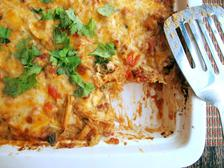
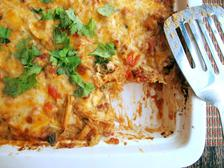
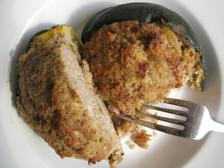
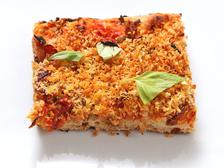
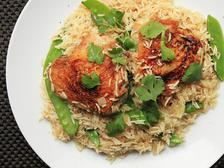
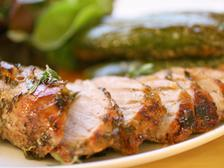
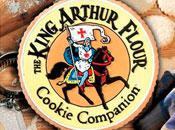
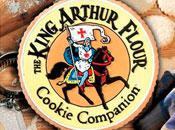
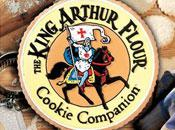
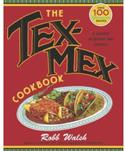
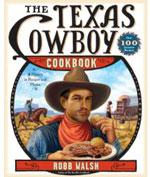
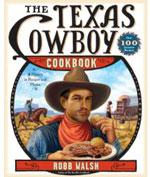
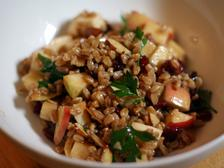
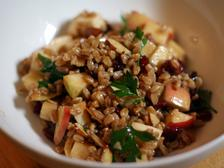
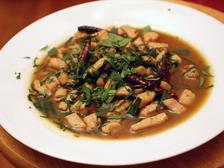
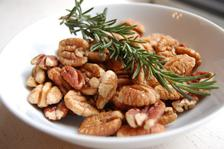
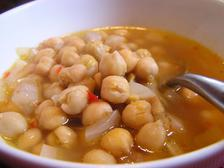
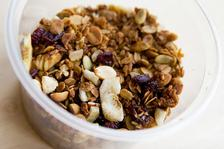
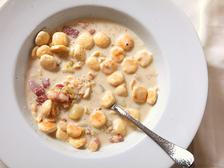
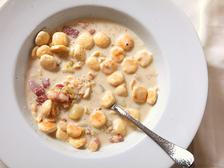
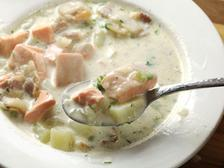
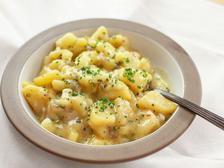
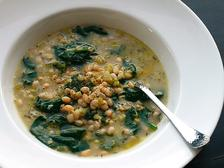
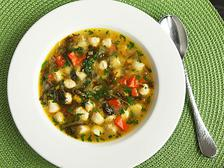
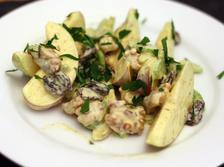
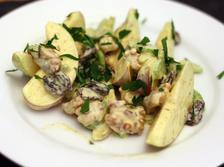
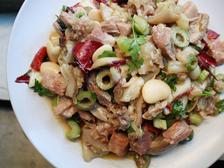
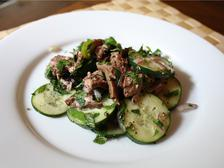
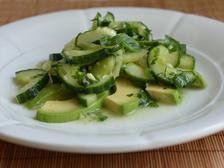
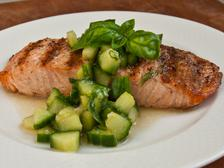
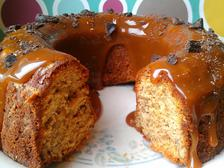
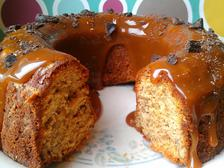
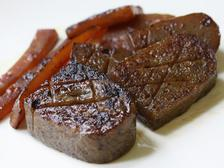
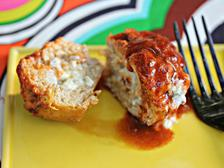
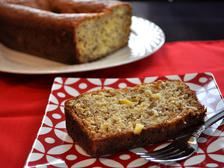
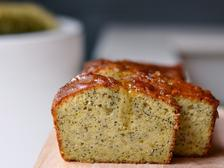
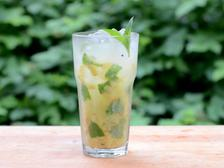
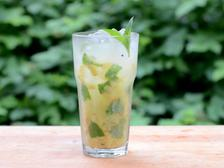
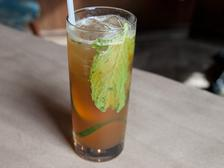
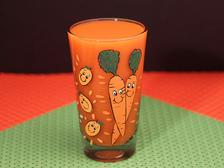
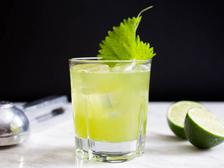
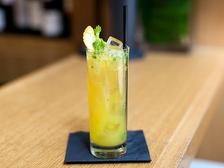
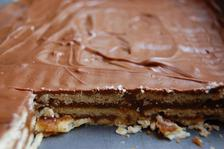
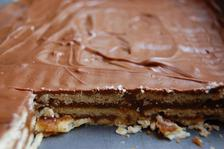
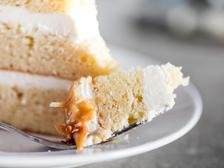
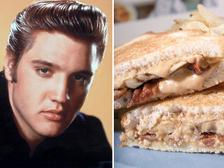
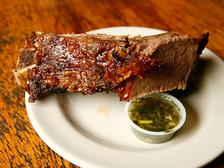
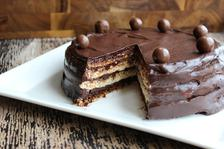
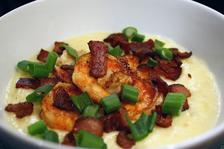
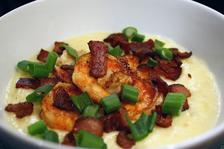
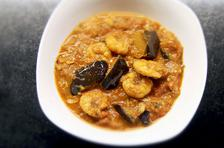
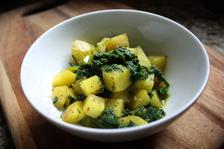
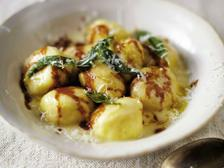
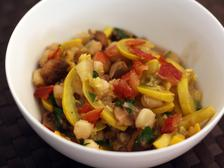
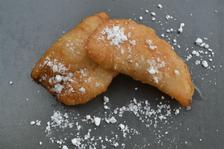
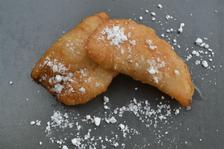
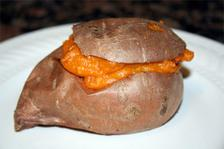
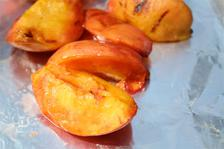
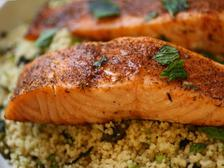
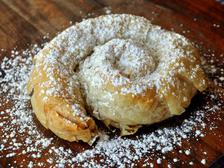
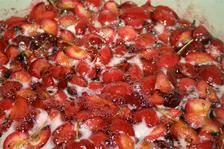
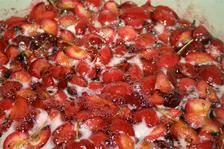
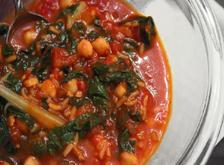
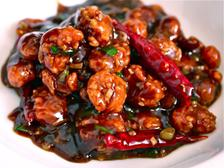
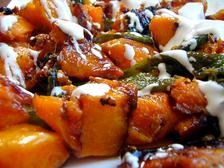
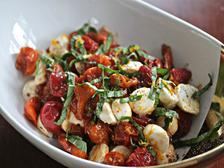
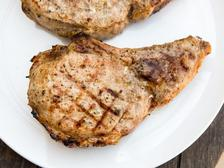
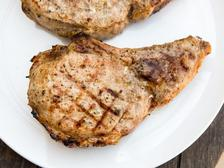
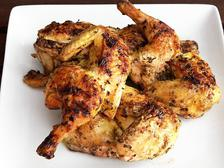
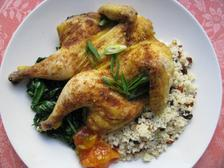
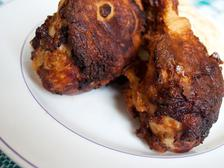
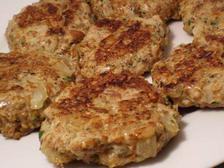
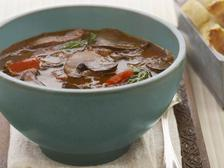
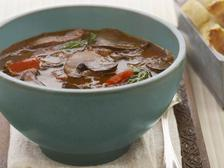
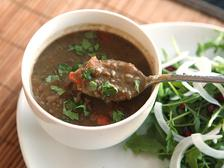
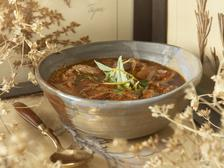
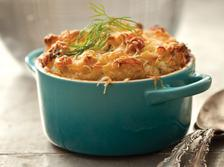
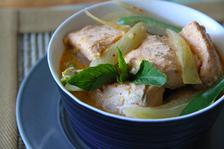
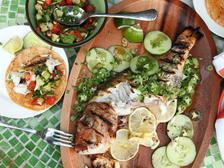
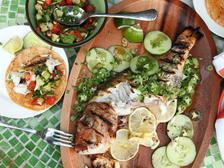
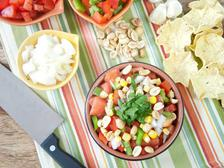
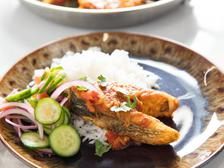
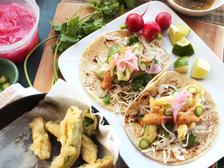
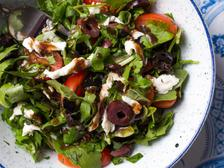
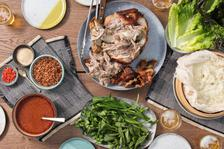
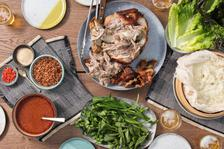
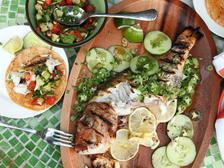
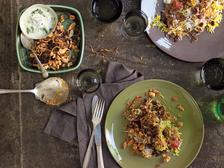
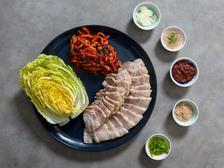
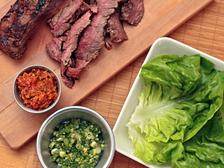

In [200]:
HTML(
    df_sample[
        ["title", "image_path", "prediction"]
        + [f"n_{n}" for n in range(number_nearest)]
    ].to_html(
        formatters={
            **{"image_path": image_formatter},
            **{f"n_{n}": image_formatter for n in range(number_nearest)},
        },
        escape=False,
    )
)